# NGC 1 Week 1 Phase 1

## 1 - Perkenalan

Nama = Muhammad Ashar Ihsan

Batch = 035

Objective = Kita akan melakukan sebuah analisis untuk memprediksi berapa biaya asurasi yang kita bayarkan dengan menggunakan machine learning dari dataset yang berisi mengenai data asuransi di United States

## 2 - Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3 - Data Loading

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# membuat copy dari dataframe yang kita miliki

df_duplicate = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Terlihat dalam datafram terdapat 1337 row yang terdiri dari 7 columns dengan tipe data 2 integer, 3 object, 2 float.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- Terlihat umur terkecil pada data yaitu 18 tahun dan tertua 64 tahun dengan rata-rata kebanyakan umur diangka 39 tahun.
- Rata-rata setiap orang dalam dataset memiliki 1 anak
- Bayaran asuransi yang dibayarkan termurah berada diangka 1121 dollar sedangkan harga asuransi tertinggai berada diangkat 63770 dollar

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak terlihat adanya missing value pada dataset

In [7]:
df.duplicated().sum()

1

Ternyata ada row yang duplicate, sehingga harus kita bersihkan dahulu.

In [8]:
baris_duplikat = df[df.duplicated()]

baris_duplikat

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Terlihat row yang terduplikasi yaitu row ke 581.

In [9]:
df = df.drop_duplicates()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.duplicated().sum()

0

Setelah row yang ter duplicate telah dihapus, dilakukan pengecekan ulang terlihat value yang terduplicate sudah bersih.

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df.rename(columns= {"sex" : 'gender'}, inplace=True)
df

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_9712\665106714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns= {"sex" : 'gender'}, inplace=True)


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Kita mencoba untuk menggati nama kolom sex menjadi gender agar lebih enak untuk dimengerti.

## 4 - Promblem

### - Smart Framework

Specific:
Memprediksi insurance charges yang dibayarkan tiap orang.

Measurable:
Akurasi dari prediksi dapat diukur dengan Mean Absolute Error (MAE) dibawah dari 5

Achievable:
Dengan proses yang tepat, penyesuaian model untuk memprediksi biaya asuransi dapat dicapai.

Relevant:
Prediksi harga asuransi yang akurat sangat penting untuk costumer dan juga perusahaan asuransinya. Dimana akan membantu untuk menentukan harga yang adil dan untuk memahami faktor yang paling mempengaruhi biaya asuransi.

Time-bound:
Model akan diterapkan dan melakukan prediksi selama 3 bulan.

### - Problem Statement 

Memprekdiksi insurance charges yang dibayarkan tiap orang dengan model yang dibuat memiliki MAE dibawah 5 dan dilakukan selama 3 bulan.

## 5 - EDA

Pertama kita akan mengkategorikan column BMI ke Class 1, 2, 3.

In [13]:
# Mendefinisikan fungsi untuk mengkategorikan overweight
def class_overweight(bmi):
    if 30 <= bmi < 35:
        return 'Overweight Class 1'
    elif 35 <= bmi < 40:
        return 'Overweight Class 2'
    elif bmi >= 40:
        return 'Overweight Class 3'
    else:
        return 'Normal/Underweight'

# Menerapkan fungsi ke kolom 'bmi'
df['overweight_class'] = df['bmi'].apply(class_overweight)

df[['bmi', 'overweight_class']].sample(20)

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_9712\4177236560.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overweight_class'] = df['bmi'].apply(class_overweight)


,bmi,overweight_class
197,28.600,Normal/Underweight
1226,16.815,Normal/Underweight
349,27.835,Normal/Underweight
428,16.815,Normal/Underweight
715,28.900,Normal/Underweight
225,33.880,Overweight Class 1
1183,27.360,Normal/Underweight
184,30.690,Overweight Class 1
120,37.100,Overweight Class 2
540,38.000,Overweight Class 2


Terlihat diatas kita telah membagi menjadi 3 kategori overweight 1, 2, dan 3 dan yang lainnya normal/underwight.

In [14]:
# Menghitung jumlah peserta per kategori
overweight_counts = df['overweight_class'].value_counts().drop('Normal/Underweight')

# Mengurutkan dari jumlah terbanyak ke terkecil
overweight_counts = overweight_counts.sort_values(ascending=False)

# Menampilkan hasil
overweight_counts

overweight_class
Overweight Class 1    390
Overweight Class 2    225
Overweight Class 3     91
Name: count, dtype: int64

Diatas terlihat jumlah dari masing-masing kategori overweight dari dataset yang kita miliki.

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_9712\245505211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overweight_counts.index, y=overweight_counts.values, palette='viridis')


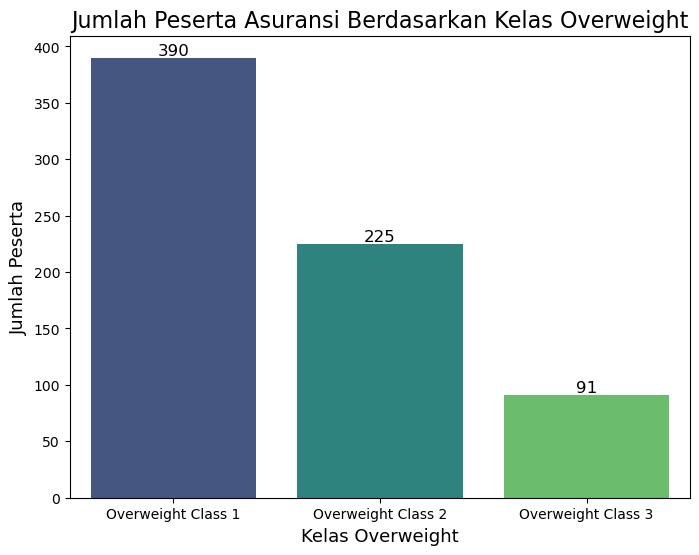

In [18]:
# membuat barplot
plt.figure(figsize=(8,6))
sns.barplot(x=overweight_counts.index, y=overweight_counts.values, palette='viridis')
plt.title('Jumlah Peserta Asuransi Berdasarkan Kelas Overweight', fontsize=16)
plt.xlabel('Kelas Overweight', fontsize=13)
plt.ylabel('Jumlah Peserta', fontsize=13)

# Menampilkan nilai di atas setiap bar
for index, value in enumerate(overweight_counts.values):
    plt.text(index, value + 2, str(value), ha='center', fontsize=12)

plt.show()

Visualisasi menggunakan barplot, terlihat didalam dataset overweight class 1 merupakan kategori yang paling banyak dibandingkan dengan overweight class 2 dan 3.